# **TABULAR PLAYGROUND ABRIL 2021**

En esta edicion del concurso, se nos pide usar una regresión lineal para evaluar, en un conjunto de datos sinteticos, cuantas personas habrían sobrevivido al hundimiento del titanic, que empezó el 14 de abril de 1912 y acabo en la madrugada del dia siguiente.

Como viene siendo costumbre hasta ahora, lo primero que haremos será dividir el ejercicio en partes, primero,cargamos las librerias que vamos a usar y añadiendo las que necesitemos a medida que vamos avanzando en el trabajo, despues cargamos los datos y hacemos una exploracion en ellos, una vez obtenida la información que consideramos importante y sacado conclusiones en base a ello, se limpian los datos para que el entrenamiento nos resulte lo mejor posible. Con los dartos limpios, entrenamos los modelos y subimos los datos con el mejor de ellos

**1- Cargamos las librerias**

pandas nos permite leer los datos del dataset

numpy es una libreria matematica

seaborn, pyplot y graph_objects son librerias graficas, para hacer las graficas

train_test_split nos permitirá dividir el dataset entre entrenamiento y validación

mean_square_error y r2_score son metricas de medicion para evaluar el error

LabelEmcoder nos permite convertir letras a valores categoricos

random se presenta a si mismo, es para dar numeros aleatorios

linear_model crea modelos de regresion lineal

keras y tensorflow nos permiten hacer redes neuronales

...

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
import random
from sklearn import linear_model
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras import layers, callbacks
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model
from xgboost import XGBClassifier as xgb
from lightgbm import LGBMClassifier as lgb

**2- Cargamos los datos y los exploramos**

In [ ]:
test = pd.read_csv('../input/tabular-playground-series-apr-2021/test.csv')
train = pd.read_csv('../input/tabular-playground-series-apr-2021/train.csv')

En un primer vistazo vemos que hay valores vacion (NaN), valores categoricos y campos alfanumericos, esto sucede tanto en el conjunto de entrenamiento como en el de prueba

In [ ]:
train.head(10)

In [ ]:
test.head(10)

Aqui vemos una descripcion de los campos con los que estamos tratando

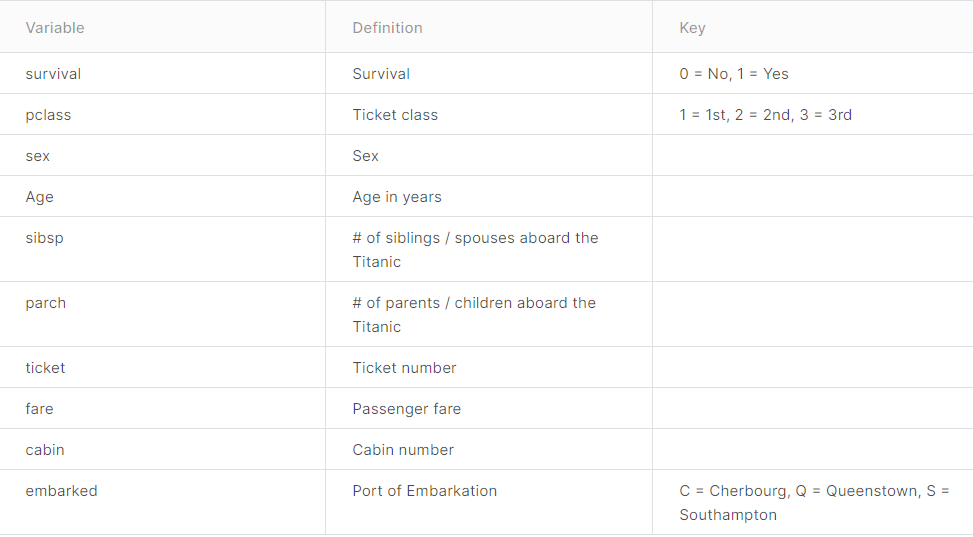![](http://)

Informacion del tipo de datos de los conjuntos de datos

In [ ]:
train.info()

In [ ]:
test.info()

Cantidad de valores nulos de los datos

In [ ]:
print(train.isnull().sum())

In [ ]:
print(test.isnull().sum())

Vemos que en ambos grupos hay un campo, Cabin, que tiene una cantidad considerable de datos vacion (hasta un 70% del total), esto lo trataremos mas adelante

Antes de empezar a graficar nada es necesario que codifiquemos el puerto de embarque para poder pasarlo sin problema a las graficas

In [ ]:
#Aplicamos un codificador a la columna categorica para transformarla en valores del 0 al 2
encoder = LabelEncoder()
encoder.fit(train['Embarked'])
train['Embarked'] = encoder.fit_transform(train['Embarked'])
test['Embarked'] = encoder.transform(test['Embarked'])
    
train.head(10)

0: Cherbourg

1: Queenstown

2: Southampton

En esta parte he querido mostrar ha sido los datos relativos y absolutos de los supervivientes en funcion de su clase, sexo y puerto de embarque

In [ ]:
muj = train['Sex'] == 'female'
hom = train['Sex'] == 'male'
PorceHom = hom.sum() / (hom.sum() + muj.sum()) * 100
PorceMuj = muj.sum() / (hom.sum() + muj.sum()) * 100
total = hom.sum() + muj.sum()
print('Total de pasajeros:', total,
      '\n\nTotal de hombres:', hom.sum(),
     '\nTotal de mujeres:', muj.sum(),
     '\nPorcentaje de hombres: %0.2f' %PorceHom,
     '\nPorcentaje de mujeres: %0.2f' %PorceMuj)

Sup = (train['Survived'] == 1)
print('\nToltal de supervivientes:',Sup.sum())

SupHom = Sup & hom
print('Total de hombres supervivientes:', SupHom.sum(),
     '\nTotal de mujeres supervivientes:', Sup.sum() - SupHom.sum())

PorceSup = (Sup.sum() / total) * 100
PorceSupHom = (SupHom.sum() / Sup.sum()) * 100
PorceSupMuj = ((Sup.sum() - SupHom.sum()) / Sup.sum()) * 100
print('Porcentaje de supervivientes:', PorceSup,
     '\nPorcentaje total de hombres supervivientes: %0.2f' %PorceSupHom,
     '\nPorcentaje total de mujeres supervivientes: %0.2f' %PorceSupMuj)

PorceRelSupHom = (SupHom.sum() / hom.sum()) * 100
PorceRelSupMuj = ((Sup.sum() - SupHom.sum()) / muj.sum()) * 100
print('Porcentaje de hombres supervivientes: %0.2f' %PorceRelSupHom,
     '\nPorcentaje de mujeres supervivientes: %0.2f' %PorceRelSupMuj)

PrimeraClase = train['Pclass'] == 1
SegundaClase = train['Pclass'] == 2
TerceraClase = train['Pclass'] == 3
print('\nTotal de pasajeros de primera clase:', PrimeraClase.sum(),
     '\nTotal de pasajeros de segunda clase:', SegundaClase.sum(),
     '\nTotal de pasajeros de tercera clase:', TerceraClase.sum())

SupPrimCla = Sup & PrimeraClase
SupSegCla = Sup & SegundaClase
SupTerCla = Sup & TerceraClase
print('Supervivientes de primera clase:', SupPrimCla.sum(),
     '\nSupervivientes de segunda clase:', SupSegCla.sum(),
     '\nSupervivientes de tercera clase:', SupTerCla.sum())
PorceSupPrimCla = (SupPrimCla.sum() / Sup.sum()) * 100
PorceSupSegCla = (SupSegCla.sum() / Sup.sum()) * 100
PorceSupTerCla = (SupTerCla.sum() / Sup.sum()) * 100
print('Porcentaje de supervivientes total de primera clase: %0.2f' %PorceSupPrimCla,
     '\nPorcentaje de supervivientes total de segunda clase: %0.2f' %PorceSupSegCla,
     '\nPorcentaje de supervivientes total de tercera clase: %0.2f' %PorceSupTerCla)

PorceRelSupPrimCla = (SupPrimCla.sum() / PrimeraClase.sum()) * 100
PorceRelSupSegCla = (SupSegCla.sum() / SegundaClase.sum()) * 100
PorceRelSupTerCla = (SupTerCla.sum() / TerceraClase.sum()) * 100
print('Porcentaje de supervivientes de primera clase: %0.2f' %PorceRelSupPrimCla,
     '\nPorcentaje de supervivientes de segunda clase: %0.2f' %PorceRelSupSegCla,
     '\nPorcentaje de supervivientes de tercera clase: %0.2f' %PorceRelSupTerCla)

Cher = train['Embarked'] == 0
Quee = train['Embarked'] == 1
Sout = train['Embarked'] == 2
print('\nTotal de pasajeros que subieron en Cherbourg:', Cher.sum(),
     '\nTotal de pasajeros que subieron en Southampton:', Sout.sum(),
     '\nTotal de pasajeros que subieron en Queenstown:', Quee.sum())

SupCher = Sup & Cher
SupSout = Sup & Sout
SupQuee = Sup & Quee
print('Supervivientes que subieron en Cherbourg:', SupCher.sum(),
     '\nSupervivientes que subieron en Southampton:', SupSout.sum(),
     '\nSupervivientes que subieron en Queenstown:', SupQuee.sum())

PorceSupCher = (SupCher.sum() / Sup.sum()) * 100
PorceSupSout = (SupSout.sum() / Sup.sum()) * 100
PorceSupQuee = (SupQuee.sum() / Sup.sum()) * 100
print('Porcentaje total de supervivientes que subieron en Cherbourg: %0.2f' %PorceSupCher,
     '\nPorcentaje total de supervivientes que subieron en Southampton: %0.2f' %PorceSupSout,
     '\nPorcentaje total de supervivientes que subieron en Queenstown: %0.2f' %PorceSupQuee)

PorceRelSupCher = (SupCher.sum() / Cher.sum()) * 100
PorceRelSupSout = (SupSout.sum() / Sout.sum()) * 100
PorceRelSupQuee = (SupQuee.sum() / Quee.sum()) * 100
print('Porcentaje de supervivientes que subieron en Cherbourg: %0.2f' %PorceRelSupCher,
     '\nPorcentaje de supervivientes que subieron en Southampton: %0.2f' %PorceRelSupSout,
     '\nPorcentaje de supervivientes que subieron en Queenstown: %0.2f' %PorceRelSupQuee)

Estos datos nos muestran que se tenía mas posibilidades de sobrevivir siendo mujer de primera clase y embarcando en Cherbourg que siendo hombre, independientemente de la clase o del puerto de embarque

En las siguientes graficas vemos todos los valores numericos representados como histogramas, en ellos vemos que, en el conjunto de entrenamiento,murieron mas personas de las que se salvaron, tambien vemos que la clase mas comun era la tercera y que habia un ligero numero de personas mas en primera clase que en segunda. La terdcera grafica nos muestra la dstribuicion de edad en grupos de 10 años, con un pico en la veintena y un minimo entre la decada de los 70 a los 80. Tambien resalta mucho la cantidad de personas que subieron en Southamton

In [ ]:
plt.rcParams["figure.figsize"] = (15, 8)
train.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis = 1).hist()
plt.show()

Ahora, con pairplot, vemos como se realcionan las variables en los conjuntos de train y test mediante regresion lineal con los supervivientes como objetivo. Pairplot nos permite relacionar de dos en dos las distintas columnas y hacer con ello una regresion lineal simple en base al parametro hue 

In [ ]:
plt.rcParams["figure.figsize"] = (15, 15)
sns.pairplot(train, hue = 'Survived',
             vars = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
            kind = 'reg')

Un mapa de calor nos muestra la correlacion entre las variables que vamos a tratar, si es una correlacion muy alta o muy baja debemos plantearnos el dejarla o no, por que puede indicar dependencia de la misma. En este caso, no encontramos dependencias directas de ninguna variable

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(train.corr(), annot = True, 
            fmt = ".2f", 
            cmap = 'coolwarm',
            cbar_kws = {"shrink": .8})

Grafica comparativa de los supervivientes segun el sexo, 0 no sobrevivio, 1 si lo hizo

In [ ]:
sns.countplot(x = 'Sex',hue = 'Survived', 
              data = train)

Grafica comparativa de los supervivientes segun la clase, 0 no sobrevivio, 1 si lo hizo

In [ ]:
sns.countplot(x = 'Pclass',hue = 'Survived', 
              data = train)

Grafico de tarta segun los supervivientes de cada clase

In [ ]:
fig = px.pie(train, values = 'Survived', 
             names = 'Pclass')
fig.show()

Grafico de tarta interactivo segun la clase y el sexo

In [ ]:
fig = px.sunburst(train, path = ['Sex', 'Pclass'], 
                  values = 'Survived', 
                  color = 'Pclass')
fig.show()

Grafico de lineas que nos devuelve el tanto por uno de los supervivientes por edad

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.set_theme(style="darkgrid")
sns.lineplot(x = "Age", y = "Survived",
             data = train)

In [ ]:
fig = px.histogram(train, 
                   x = 'Survived',
                   color = 'Survived',
                   title = 'Histograma de supervivientes')

fig.update_layout(bargap = 0.2)

fig.show()

La forma correcta de leer el grafico siguiente es, en el centro, la clase a la que pertenecian los pasajeros, en el exterior, el puerto de embarque y los supervivientes por puerto (estos se ven al poner el raton encima o haciendo click en una clase)

In [ ]:
fig = px.sunburst(train, path = ['Pclass', 'Embarked'], 
                  values = 'Survived', 
                  color = 'Pclass')
fig.show()

Este grafico es el mismo que antes, solo se ha cambiado el orden

In [ ]:
fig = px.sunburst(train, path = ['Embarked', 'Pclass'], 
                  values = 'Survived', 
                  color = 'Pclass')
fig.show()

**3- Limpieza de datos**

Ahora, antes de meter los datos en un algoritmo de regresion lineal, debemos tratarlos, limpiarlos y, en defnitiva, manipularlos para que estos nos puedan entregar informacion util sobre las posibilidades de supervivencia en el Titanic.
Sabemos que el campo 'cabin' tiene muchos valores perdidos (mas de un 65% en el conjunto de entrenamiento y un 70% en el de test), por ello es mejor eliminarlo que intentar arreglarlo

In [ ]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

El siguiente valor que vamos a tratar es la edad ('age') de los pasajeros, en este caso nos enfrentamos a casi 3500 valores vacios en ambos conjuntos, como los datos entregados no siguen un orden de edad, creo que lo mejor es rellenar los datos con valores aleatorios que esten en el rango de la media de edad mas menos la desviacion estandar. Para esto se usará la funcion "uniform(a, b)", que devuelva valores aleatorios comprendidos entre los valores a y b

In [ ]:
train_edad_media = train['Age'].mean()
train_edad_std = train['Age'].std()
print('Edad media: %0.2f' %train_edad_media,
     '\nDesviacion estandar: %0.2f' %train_edad_std)

Con esto tenemos una edad media de 38.36 con una maxima de 56.67 y una minima de 20.05

In [ ]:
train['Age'] = train['Age'].fillna(value = random.uniform(20.05, 56.67))
print(train['Age'])

In [ ]:
train['Age'].isnull().sum()

In [ ]:
print(train['Age'].mean())

In [ ]:
test_edad_media = test['Age'].mean()
test_edad_std = test['Age'].std()
print('Edad media: %0.2f' %test_edad_media,
     '\nDesviacion estandar: %0.2f' %test_edad_std)

In [ ]:
test['Age'] = test['Age'].fillna(value = random.uniform(16.52, 44.62))
print(test['Age'])

In [ ]:
test['Age'].isnull().sum()

In [ ]:
print(test['Age'].mean())

El tercer caso que vamos a tratar con valores perdidos es el del 'Ticket', en este caso, aunque no falten muchos casos, el hecho que sea un campo alphanumerico me hace mas simple el desecharlo que el intentar tratarlo

In [ ]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket', 'Name'], axis = 1)

Por ultimo, nos falta ajustar la tarifa que pagó cada pasajero. En cada uno  de los grupos hay poco mas de un 0.13% de datos faltantes, esto no resulta una cantidad lo suficentemente grande como para que nos cambie ucho el proceso, asi que lo primero que vamos a hacer es llenar esas casillas de ceros y ver como afecta a la media, si es muy significativo en cualquiera de los dos casos, habrá que hacer algo similar al caso de la edad

In [ ]:
train['Fare'].mean()

In [ ]:
test['Fare'].mean()

In [ ]:
train['Fare'].fillna(0).mean()

In [ ]:
test['Fare'].fillna(0).mean()

Como se puede ver, el cambio es muy pequeño

In [ ]:
train['Fare'] = train['Fare'].fillna(0)
test['Fare'] = test['Fare'].fillna(0)

In [ ]:
#Aplicamos un codificador a la columna categorica para transformarla en valores del 0 al 1
encoder = LabelEncoder()
encoder.fit(train['Sex'])
train['Sex'] = encoder.fit_transform(train['Sex'])
test['Sex'] = encoder.transform(test['Sex'])
    
train.head(10)

In [ ]:
y = train['Survived']
X = train.drop(['Survived', 'Name'], axis = 1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 10)
print('Tamaño del conjunto de entrenamiento: ',X_train.shape,
      '\nTamaño del conjunto de validacion: ',X_val.shape)

In [ ]:
X_train.head()

**4- Comparacion de modelos**


1- Regresion lineal

In [ ]:
model = linear_model.LinearRegression(n_jobs = -1)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [ ]:
# print('error cuadratico medio:', mean_squared_error(y_train, y_pred))

2- RNA

In [ ]:
model2 = Sequential([
    keras.layers.BatchNormalization(input_shape = (8,)),
    
    keras.layers.Dense(256, activation = 'relu'),
    
    keras.layers.Dropout(rate = 0.3),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(256, activation = 'relu'),
    
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate = 0.3),
    
    keras.layers.Dense(256, activation = 'relu'),
    
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate = 0.3),
    
    keras.layers.Dense(1, activation = 'sigmoid')
])
model2.summary()

In [ ]:
model2.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['binary_accuracy'])

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 50,
    restore_best_weights = True
    )

model_checkpoint = ModelCheckpoint('./best_model.hdf5',
                                   monitor = 'val_loss', 
                                   mode = "min", verbose = 0, 
                                   save_best_model = True)

In [ ]:
history = model2.fit(
    X_train,
    y_train,
    validation_data = (X_val, y_val),
    batch_size = 512,
    epochs = 500,
    callbacks = [early_stopping, model_checkpoint],
    verbose = 0
    )

In [ ]:
print(history.history.keys())

In [ ]:
accuracy = history.history['binary_accuracy']
val_accuracy = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(accuracy)

plt.figure()

plt.plot(range(epochs), accuracy, 'b', label='Training accuracy')
plt.plot(range(epochs), val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(range(epochs), loss, 'b', label='Training Loss')
plt.plot(range(epochs), val_loss, 'r', label='Training Loss')
plt.title('Training and validation loss')

plt.show()

In [ ]:
model2 = load_model("./best_model.hdf5")

In [ ]:
model2.evaluate(X_val, y_val, verbose = 1)

3- Light Gradient Boosting Machine

In [ ]:
model3 = lgb(max_depth=123,
             n_estimators = 95,
             n_jobs = -1,
             num_leaves = 65)

model3.fit(X_train, y_train)

predict3 = model3.predict(X_val)

print(accuracy_score(y_val, predict3))

4- XGboost

In [ ]:
model4 = xgb(max_depth = 500,
             n_stimators = 100,
             n_jobs = -1)

model4.fit(X_train, y_train)

predict4 = model4.predict(X_val)

print(accuracy_score(y_val, predict4))

In [ ]:
test_pred = model2.predict(test)
test['Survived'] = test_pred
submission = test[['PassengerId','Survived']]
submission['Survived'] = np.where(test_pred > 0.5, 1, 0)
submission.to_csv('submision.csv', index = False)

In [ ]:
!kaggle competitions submit -c tabular-playground-series-apr-2021 -f submission.csv -m "Message"